In [84]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [85]:
def epxponential_cdf(lmbda, time):
    return 1 - math.exp(-lmbda * time) 

class ExponentialFailureEvents:
    def __init__(self, failuer_event_interval, time_period=60):
        # np.random.seed(0)
        self.failuer_event_interval = failuer_event_interval
        self.time_period = time_period
        self.lmbda = 1 / failuer_event_interval

    def retrieve_status(self, time_step):
        failure_event_probability = epxponential_cdf(self.lmbda, time_step)
        return np.random.choice([True, False], p=[1 - failure_event_probability, failure_event_probability]), failure_event_probability

    def plot(self, total_time_step):
        samples = np.zeros((total_time_step, 2), dtype=float)
        ups = np.zeros((total_time_step), dtype=float)
        downs = np.ones((total_time_step), dtype=float)
        for time_step in range(total_time_step):
            samples[time_step, :] = self.retrieve_status(time_step)
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(range(total_time_step), samples[:, 1], label='probability of failure')
        ups[samples[:, 0] == True] = 1
        ups[samples[:, 0] == False] = np.nan
        downs[samples[:, 0] == False] = 0
        downs[samples[:, 0] == True] = np.nan
        ax.plot(range(total_time_step), ups, 'go', label='system up')
        ax.plot(range(total_time_step), downs, 'ro', label='system down')
        ax.set_xlabel('time step')  # Add an x-label to the axes.
        ax.set_ylabel('probability of failure')  # Add a y-label to the axes.
        ax.set_title(f"probability of failure if for each event occured at {self.failuer_event_interval} in {self.time_period}")  # Add a title to the axes.
        ax.legend()

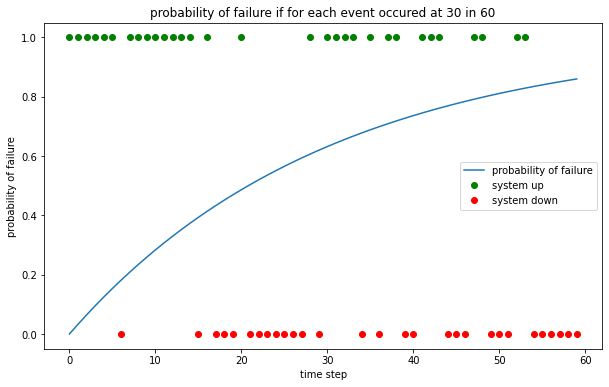

In [86]:
total_times=60
event_interval = 40
exp=ExponentialFailureEvents(event_interval)
exp.plot(total_times)

In [88]:
epxponential_cdf(1/40,50)

0.7134952031398099